
# {{ exercise }} Histogram of Oriented Gradients (HOG)


In this exercise, you will use skiamge to calculate HOG features. HOG
features have successfully been used for various types of object
detection via classification. We will use it next week for detection of
pedestrians.

In the following section, you are reintroduced (see the classification lecture slides) to the [HOG descriptor](https://en.wikipedia.org/wiki/Histogram_of_oriented_gradients), shown how to calculate a HoG featues for an image, which includes a visualization of the HoG descriptor.

## Algorithm overview

Compute a Histogram of Oriented Gradients (HOG) by

1.  Preprocessing / smoothing

2.  Calculate image gradients for each pixel

3.  Subdivide the image into $N \times N$ cells, and for each cell
    calculate a histogram of edge magnitudes and orientations

4.  Normalize the cells across larger regions incorporating multiple cells (`blocks`).

5.  Concatenate the histograms of each block into one feature vector.


The first stage applies an optional global image normalisation
equalisation that is designed to reduce the influence of illumination
effects. In practice we use gamma (power law) compression, either
computing the square root or the log of each color channel.
Image texture strength is typically proportional to the local surface
illumination so this compression helps to reduce the effects of local
shadowing and illumination variations.

The second stage computes first order image gradients. These capture
contour, silhouette and some texture information, while providing
further resistance to illumination variations. The locally dominant
color channel is used, which provides color invariance to a large
extent. Variant methods may also include second order image derivatives,
which act as primitive bar detectors - a useful feature for capturing,
e.g. bar like structures in bicycles and limbs in humans.

The third stage aims to produce an encoding that is sensitive to
local image content while remaining resistant to small changes in
pose or appearance. The adopted method pools gradient orientation
information locally. The image window is divided into small spatial regions,
called "cells". For each cell we accumulate a local 1-D histogram
of gradient or edge orientations over all the pixels in the
cell. This combined cell-level 1-D histogram forms the basic
"orientation histogram" representation. Each orientation histogram
divides the gradient angle range into a fixed number of
predetermined bins. The gradient magnitudes of the pixels in the
cell are used to vote into the orientation histogram.

The fourth stage computes normalisation, which takes local groups of
cells and contrast normalises their overall responses before passing
to next stage. Normalisation introduces better invariance to illumination,
shadowing, and edge contrast. It is performed by accumulating a measure
of local histogram "energy" over local groups of cells that we call
"blocks". The result is used to normalise each cell in the block.
Typically each individual cell is shared between several blocks, but
its normalisations are block dependent and thus different. The cell
thus appears several times in the final output vector with different
normalisations. This may seem redundant but it improves the performance.
We refer to the normalised block descriptors as Histogram of Oriented
Gradient (HOG) descriptors.

The final step collects the HOG descriptors from all blocks of a dense
overlapping grid of blocks covering the detection window into a combined
feature vector for use in the window classifier.


(480, 852, 3)


Text(0.5, 1.0, 'Input image')

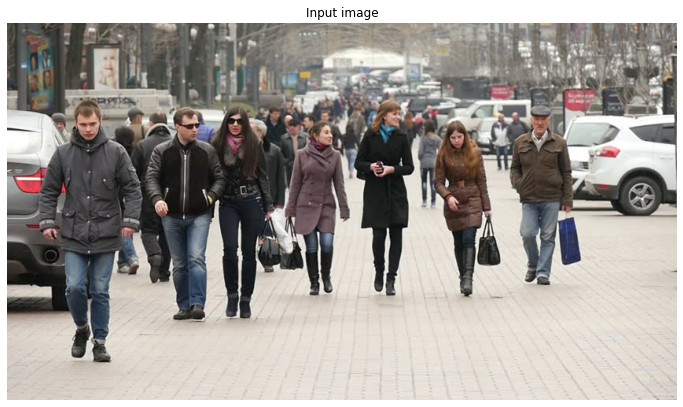

In [11]:
## load input image
import matplotlib.pyplot as plt


fn =  "./inputs/people01.jpg"
image = plt.imread(fn)
print(image.shape)


feature_vector=True,

fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(4, 4), visualize=True,feature_vector=True, channel_axis=-1)


fig, ax1 = plt.subplots(figsize=(12, 8), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

## Task 
1.  **Calculate the HOG descriptor:** After block normalization
    concatenate the resulting histograms into the final HOG feature
    descriptor (vector). Use the function [skimage.feature.hog](https://scikit-image.org/docs/stable/api/skimage.feature.html#skimage.feature.hog) to compute the feature
    descriptor vector from the resized image. Use the command:

    ```bash
    (fd, hog) = hog(
    image,
    orientations=bins,
    pixels_per_cell=(pixels_per_cell, pixels_per_cell),
    cells_per_block=(cells_per_block, cells_per_block),
    block_norm="L2",
    visualize=True,
    feature_vector=True,
    channel_axis=-1)
    ```

    The function `skimage.features.hog` also returns the feature descriptor vector (`H`), in which its
    size is equals to the number of: Bins $\times$ Block Columns
    $\times$ Block Rows $\times$ Cells in the Block.

In [15]:
from skimage.feature import hog

feature_vector=True,
bins = 8 
pixels_per_cell = 16
cells_per_block = 4 


# <!--                            YOUR CODE HERE                             -->

fd,hog_image = image # replace this hog feature restults. fd is the feature vector and hog_image the visualization of the calculated gradients.


Now we visualize the HoG features

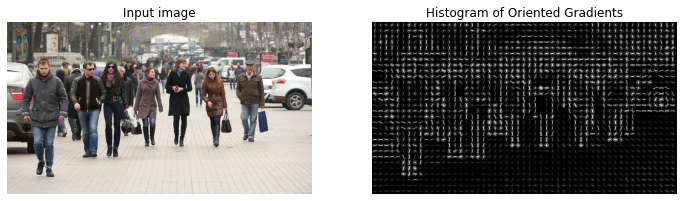

In [12]:


from skimage import data, exposure

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')

plt.show()

(3200,)


(25, 4, 4, 8)

2.  **Test the HOG descriptor:** Test your implementation by selecting
    multiple images available in our dataset (`peopleXY.jpg`). You
    have to compare (visually) the HOG features of people and non-people
    images. 
    Try changing:
    - The number of bins
    - The number of pixels per cell
    - The number of cells per block


## Interpretation/ Understanding questions
- The number of cells per block does not change the visulization, why is that? what does it actually affect?
- How much does the features space reduce by doing HoG (compare to the default setting?
- What is visually needed for humans to identify objects visually, compare it to hog features?
- How would you apply HoG features in practice to classify different object in an image? 

We will get back to that next week!